# CAR ACCIDENT SEVERITY
## Introduction



Car accidents are one of the leading causes of loss of lives and destruction of property. In this study we seek to study the common causes of car accidents and how they can be prevented. This analysis seeks to enable the drivers to be more careful depending on the weather and road conditions on any given day or a way for the police to enforce more safety protocols. To attain this we shall use Collisions Data from City of Seattle’s police department showing all the collisions from 2004.

## Data

We shall use an extensive dataset from City of Seattle’s Police Department showing collisons from 2004 to date. To build a model to prevent future accidents and/or reduce their severity, we will use the following attributes — SEVERITYCODE,ADDRTYPE, WEATHER, ROADCOND, VEHCOUNT, PERSONCOUNT,JUNCTIONTYPE, LIGHTCOND, PEDCOUNT, PEDCYLCOUNT.

In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [3]:
df=pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [6]:
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


## Methodology


In [7]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [13]:
df_accidents=df[['ADDRTYPE','ROADCOND','VEHCOUNT','WEATHER','PERSONCOUNT','SEVERITYCODE','JUNCTIONTYPE','LIGHTCOND','PEDCOUNT','PEDCYLCOUNT']]

In [14]:
df_accidents.head()

,ADDRTYPE,ROADCOND,VEHCOUNT,WEATHER,PERSONCOUNT,SEVERITYCODE,JUNCTIONTYPE,LIGHTCOND,PEDCOUNT,PEDCYLCOUNT
0,Intersection,Wet,2,Overcast,2,2,At Intersection (intersection related),Daylight,0,0
1,Block,Wet,2,Raining,2,1,Mid-Block (not related to intersection),Dark - Street Lights On,0,0
2,Block,Dry,3,Overcast,4,1,Mid-Block (not related to intersection),Daylight,0,0
3,Block,Dry,3,Clear,3,1,Mid-Block (not related to intersection),Daylight,0,0
4,Intersection,Wet,2,Raining,2,2,At Intersection (intersection related),Daylight,0,0


In [16]:
import seaborn as sns

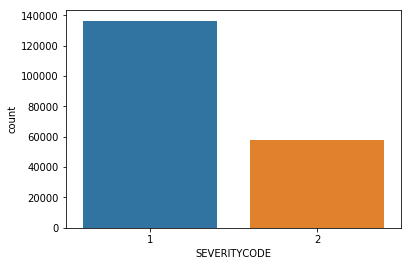

In [17]:

sns.countplot(df['SEVERITYCODE'],data=df_accidents)

In [20]:
numerical=['PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']
categorical=['ADDRTYPE','ROADCOND','WEATHER','SEVERITYCODE','JUNCTIONTYPE','LIGHTCOND']
df=df[numerical+categorical]
df.shape

(194673, 10)

AttributeError: 'AxesSubplot' object has no attribute 'get'

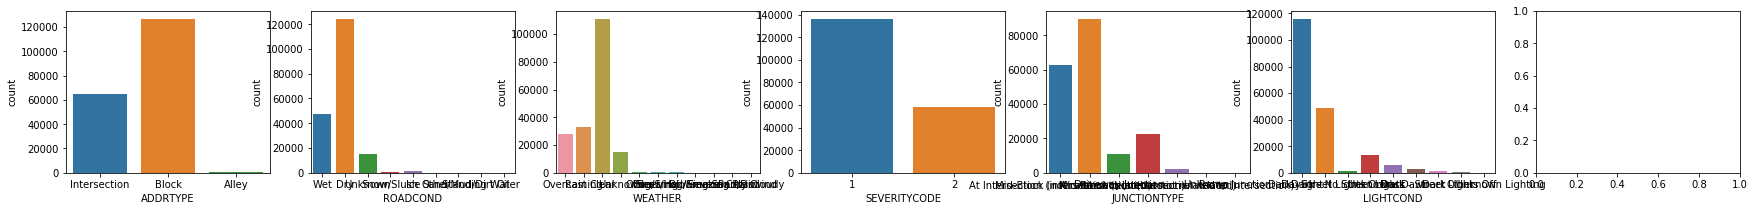

In [24]:
fig, ax=plt.subplots(1,7,figsize=(30,5))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df[variable],ax=subplot)
plt.subplots_adjust(bottom=0.3, top=0.75)
for label in subplot.get.xticklabels():
    label.set_rotation(90)


In [25]:
correlation=df.corr()

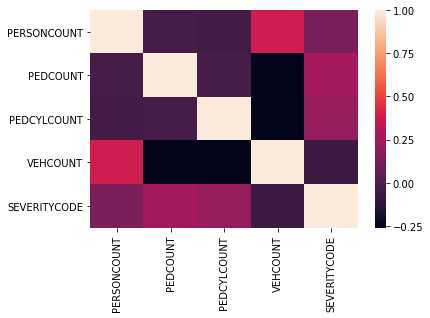

In [27]:
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns)

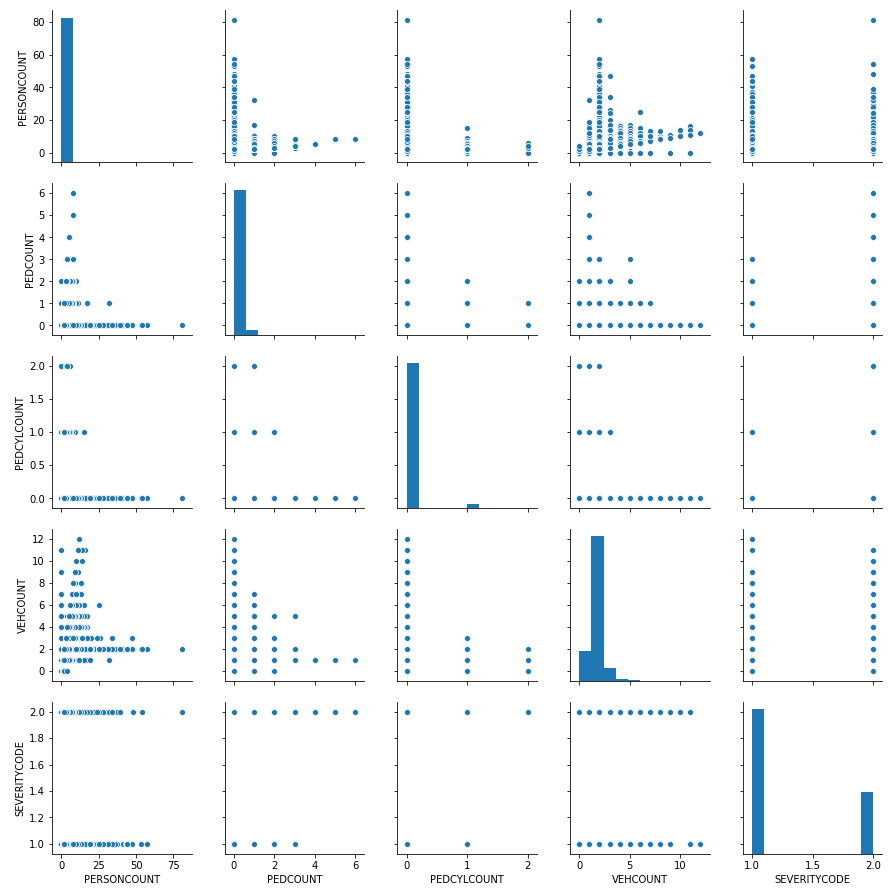

In [28]:
sns.pairplot(df)

### converting categorical variables to numerical variables 

In [39]:
df.shape

(194673, 10)

In [40]:
Null_values = df.isnull().sum()
Null_values[0:10]

PERSONCOUNT        0
PEDCOUNT           0
PEDCYLCOUNT        0
VEHCOUNT           0
ADDRTYPE        1926
ROADCOND        5012
WEATHER         5081
SEVERITYCODE       0
JUNCTIONTYPE    6329
LIGHTCOND       5170
dtype: int64

In [41]:

df['ADDRTYPE'] = df['ADDRTYPE'].fillna(0)
df['ADDRTYPE'] = df['ADDRTYPE'].replace(0,'others')

df['WEATHER'] = df['WEATHER'].fillna(0)
df['WEATHER'] = df['WEATHER'].replace(0,'others')

df['ROADCOND'] = df['ROADCOND'].fillna(0)
df['ROADCOND'] = df['ROADCOND'].replace(0,'others')

df['LIGHTCOND'] = df['LIGHTCOND'].fillna(0)
df['LIGHTCOND'] = df['LIGHTCOND'].replace(0,'others')

df['JUNCTIONTYPE'] = df['JUNCTIONTYPE'].fillna(0)
df['JUNCTIONTYPE'] = df['JUNCTIONTYPE'].replace(0,'others')

In [42]:
Null_values = df.isnull().sum()
Null_values[0:10]

PERSONCOUNT     0
PEDCOUNT        0
PEDCYLCOUNT     0
VEHCOUNT        0
ADDRTYPE        0
ROADCOND        0
WEATHER         0
SEVERITYCODE    0
JUNCTIONTYPE    0
LIGHTCOND       0
dtype: int64

In [43]:
from sklearn import preprocessing

addrtype = preprocessing.LabelEncoder()
addrtype.fit(['Intersection','Block','Alley','others'])
df['ADDRTYPE'] = addrtype.transform(df['ADDRTYPE'])

jun = preprocessing.LabelEncoder()
jun.fit(df['JUNCTIONTYPE'])
df['JUNCTIONTYPE'] = jun.transform(df['JUNCTIONTYPE'])

weathercond = preprocessing.LabelEncoder()
weathercond.fit(df['WEATHER'])
df['WEATHER'] = weathercond.transform(df['WEATHER'])

roadcond = preprocessing.LabelEncoder()
roadcond.fit(df['ROADCOND'])
df['ROADCOND'] = roadcond.transform(df['ROADCOND'])

light = preprocessing.LabelEncoder()
light.fit(df['LIGHTCOND'])
df['LIGHTCOND'] = light.transform(df['LIGHTCOND'])

## Logistic Regression

In [48]:
from sklearn.model_selection import train_test_split

X = df[['ADDRTYPE','ROADCOND','VEHCOUNT','WEATHER','PERSONCOUNT','JUNCTIONTYPE','LIGHTCOND','PEDCOUNT','PEDCYLCOUNT']]
y = df[['SEVERITYCODE']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [51]:
yhat = LR.predict(X_test)
yhat

array([1, 2, 1, ..., 2, 1, 1])

In [52]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.81733499, 0.18266501],
       [0.2437476 , 0.7562524 ],
       [0.88261244, 0.11738756],
       ...,
       [0.46042872, 0.53957128],
       [0.69350433, 0.30649567],
       [0.52244537, 0.47755463]])

## Model Evaluation and Results

In [56]:
from sklearn.metrics import accuracy_score, f1_score, r2_score, confusion_matrix, classification_report

print('Accuracy Score:', accuracy_score(yhat,y_test))
print('F1 score:',f1_score(yhat,y_test))
print('confusion matrix:')
print(confusion_matrix(y_test, yhat))
print('classification report:')
print(classification_report(y_test,yhat))

Accuracy Score: 0.7510209323231026
F1 score: 0.8458431397493797
confusion matrix:
[[26595   764]
 [ 8930  2646]]
classification report:
              precision    recall  f1-score   support

           1       0.75      0.97      0.85     27359
           2       0.78      0.23      0.35     11576

   micro avg       0.75      0.75      0.75     38935
   macro avg       0.76      0.60      0.60     38935
weighted avg       0.76      0.75      0.70     38935



## Conclusion

Attributes such as Weather, Road conditions, Light conditions, addresstype, junctiontype are able to give good insights on causes of accidents therefore can guide drivers on whether to travel or not.